<a href="https://colab.research.google.com/github/kevincltsai/pytorch/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn # functions
import torch.nn.functional as F # functions
import torch.optim as optim # optimizer
from torchvision import datasets, transforms

Define Models

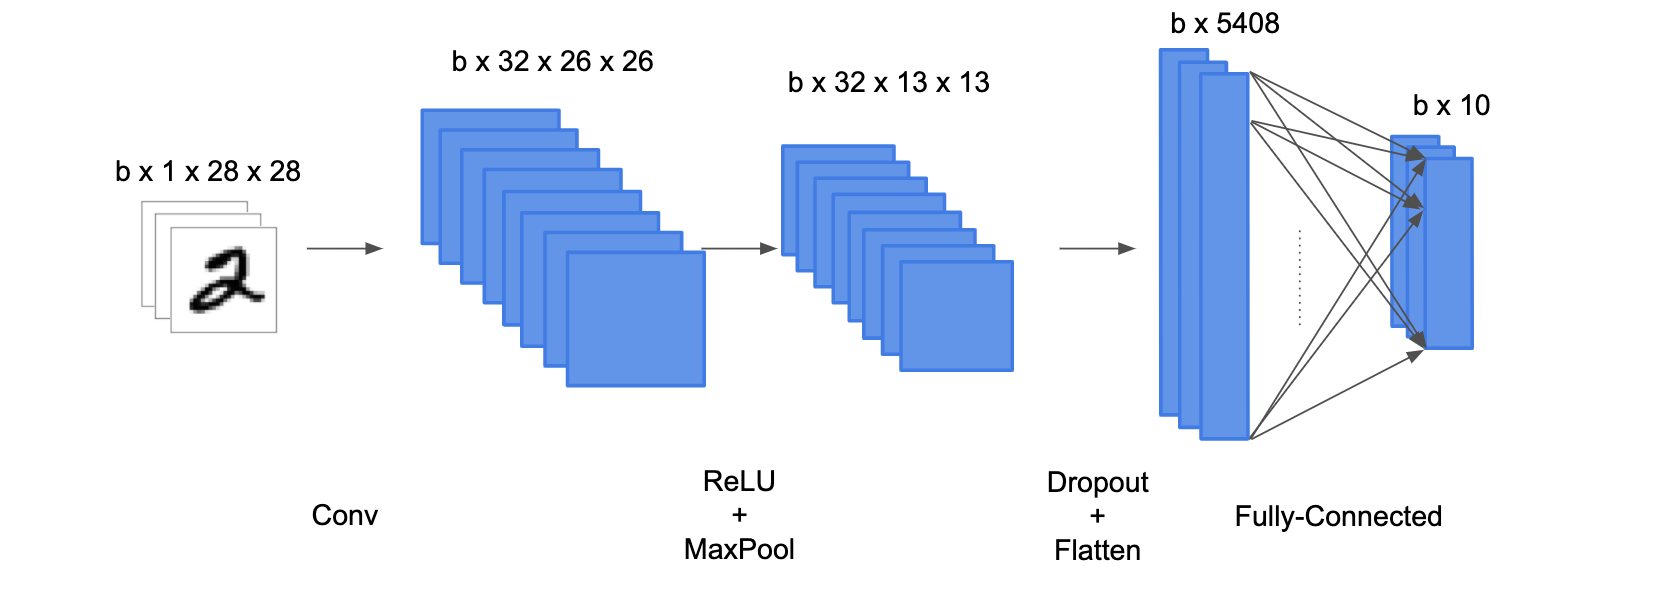

In [4]:
class Net(nn.Module):
  #define constructor
  def __init__(self):
    super(Net, self).__init__() # inherit
    # initialize objects
    self.conv = nn.Conv2d(1,32,3) # in_channel, out_channel, kernel size
    self.dropout = nn.Dropout2d(0.25) # randomly dropout 25% of neurons
    self.fc = nn.Linear(5408,10) # fully connected

  def forward(self, x):
    x = self.conv(x)
    x = F.relu(x)
    x = F.max_pool2d(x,2)
    x = self.dropout(x)

    x = torch.flatten(x,1) # flatten the image for feeding fc
    x = self.fc(x)
    output = F.log_softmax(x, dim=1)
    return output


Define Training Function

In [6]:
def train(model, train_loader, optimizer, epochs, log_interval):
  model.train() # turn the model into training mode,

  for epoch in range(1, epochs + 1):
    for batch_idx, (data, target) in enumerate(train_loader):

      # Clear gradient
      optimizer.zero_grad()

      # Forward propagation
      output = model(data)

      # Negative log likelihood loss
      loss = F.nll_loss(output, target)

      # Back propagation
      loss.backward()

      # Parameter update
      optimizer.step()

      # Log training info
      if batch_idx % log_interval == 0:
          print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, batch_idx * len(data), len(train_loader.dataset),
              100. * batch_idx / len(train_loader), loss.item()))

Testing Function

In [7]:
def test(model, test_loader):
  model.eval() # turn the model into val mode
  test_loss = 0
  correct = 0

  with torch.no_grad(): # disable gradient calculation for efficiency
    for data, target in test_loader:
      # Prediction
      output = model(data)

      # Compute loss & accuracy
      test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
      pred = output.argmax(dim=1, keepdim = True) # get the index of the max log-probability
      correct += pred.eq(target.view_as(pred)).sum().item() # how many predictions in this batch are correct

      test_loss /= len(test_loader.dataset)

      # Log testing info
      print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          test_loss, correct, len(test_loader.dataset),
          100. * correct / len(test_loader.dataset)))

In [8]:
def main():
    # Training settings
    BATCH_SIZE = 64
    EPOCHS = 2
    LOG_INTERVAL = 10

    # Define image transform
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)) # mean and std for the MNIST training set
    ])

    # Load dataset
    train_dataset = datasets.MNIST('./data', train=True, download=True,
                       transform=transform)
    test_dataset = datasets.MNIST('./data', train=False,
                       transform=transform)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

    # Create network & optimizer
    model = Net()
    optimizer = optim.Adam(model.parameters())

    # Train
    train(model, train_loader, optimizer, EPOCHS, LOG_INTERVAL)

    # Save and load model
    torch.save(model.state_dict(), "mnist_cnn.pt")
    model = Net()
    model.load_state_dict(torch.load("mnist_cnn.pt"))

    # Test
    test(model, test_loader)

In [9]:
main()

100%|██████████| 9912422/9912422 [00:00<00:00, 66694115.85it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 12765907.24it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38833687.44it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12541493.59it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303986
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.997048
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.486637
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.350166
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.322802
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.303022
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.245164
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.340602
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.624467
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.218407
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.231347
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.273474
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.203709
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.119675
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.308225
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.368544
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.478092
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.243310
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.402129
Trai